### 1. All stations

#### 1.1 use_day

使用全部的训练数据，还是仅使用整天的数据。
- 效果上看，使用整天的数据效果更好
- 两种情况下都在80次迭代处达到最好的效果，说明需要减小学习率

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/seq2seq_result_use_day.csv")

In [3]:
name_group = {"1.175656235322261":"smape", "multivariate_0_iteractions":"iteraction"}
df.rename(columns=name_group, inplace=True)
df['iteraction'] = df['iteraction'].apply(lambda x : x.split("_")[1])

In [4]:
df.sort_values(by="smape").head(10)

,iteraction,smape
78,80,0.656448
4,130,0.662749
33,400,0.684593
14,220,0.685847
2,110,0.689971
29,360,0.690649
96,970,0.695859
3,120,0.697356
52,570,0.698088
89,90,0.698489


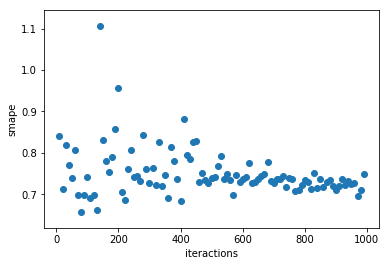

In [5]:
plt.scatter(df["iteraction"].values, df["smape"].values)
plt.xlabel("iteractions")
plt.ylabel("smape")

In [6]:
df = pd.read_csv("data/seq2seq_result_no_use_day.csv")

In [7]:
name_group = {"1.2978887264606485":"smape", "multivariate_0_iteractions":"iteraction"}
df.rename(columns=name_group, inplace=True)
df['iteraction'] = df['iteraction'].apply(lambda x : x.split("_")[1])

In [8]:
df.sort_values(by="smape").head(10)

,iteraction,smape
47,80,0.668480
0,100,0.678077
7,160,0.691710
48,90,0.702282
31,380,0.705131
23,30,0.713887
38,440,0.714284
10,190,0.716634
6,150,0.723689
18,260,0.737854


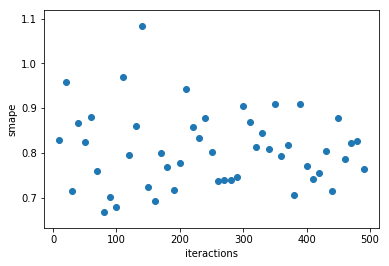

In [9]:
plt.scatter(df["iteraction"].values, df["smape"].values)
plt.xlabel("iteractions")
plt.ylabel("smape")

#### 1.2 use meo

使用天气数据的结果略好于不用的结果

In [16]:
df = pd.read_csv("data/meo_and_aq_seq2seq_result.csv")

In [22]:
df.shape

(49, 2)

In [18]:
name_group = {"1.2090569966102747":"smape", "multivariate_0_iteractions":"iteraction"}
df.rename(columns=name_group, inplace=True)
df['iteraction'] = df['iteraction'].apply(lambda x : x.split("_")[1])

In [19]:
df.head()

,iteraction,smape
0,100,0.711056
1,10,0.760534
2,110,0.702809
3,120,0.653970
4,130,0.749677


In [20]:
df.sort_values(by="smape").head(10)

,iteraction,smape
44,50,0.651125
47,80,0.651255
3,120,0.653970
17,250,0.689419
34,40,0.690858
2,110,0.702809
38,440,0.703454
42,480,0.709949
40,460,0.710117
0,100,0.711056


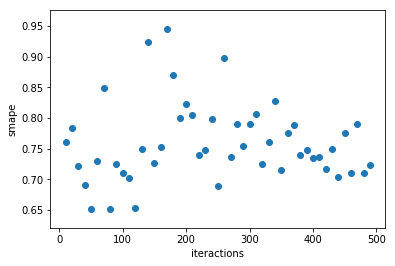

In [21]:
plt.scatter(df["iteraction"].values, df["smape"].values)
plt.xlabel("iteractions")
plt.ylabel("smape")

#### 1.3 hidden_dim

对于有385个输入特征的模型来说，hidden_dim=128(smape=0.675)的模型的效果不如hidden_dim=512(smape=0.651)的模型

In [44]:
df = pd.read_csv("data/meo_and_aq_seq2seq_result.csv")

In [45]:
df.head()

,multivariate_0_iteractions,1.002269293861284
0,multivariate_100_iteractions,0.693756
1,multivariate_10_iteractions,0.758698
2,multivariate_110_iteractions,0.719533
3,multivariate_120_iteractions,0.837503
4,multivariate_130_iteractions,0.764995


In [46]:
name_group = {"1.002269293861284":"smape", "multivariate_0_iteractions":"iteraction"}
df.rename(columns=name_group, inplace=True)
df['iteraction'] = df['iteraction'].apply(lambda x : x.split("_")[1])

In [49]:
df.sort_values(by="smape").head(10)

,iteraction,smape
23,30,0.675486
44,50,0.692172
9,180,0.692261
0,100,0.693756
24,310,0.696214
28,350,0.701091
22,300,0.701470
10,190,0.702103
47,80,0.703579
16,240,0.704709


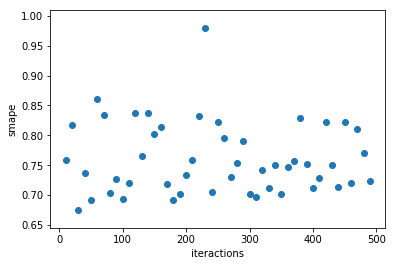

In [50]:
plt.scatter(df["iteraction"].values, df["smape"].values)
plt.xlabel("iteractions")
plt.ylabel("smape")

#### 1.4 loss function

使用了 L1 损失函数，smape = 0.675

In [51]:
df = pd.read_csv("data/meo_and_aq_seq2seq_result.csv")

In [52]:
df.head()

,multivariate_0_iteractions,1.0361837465206851
0,multivariate_100_iteractions,0.782752
1,multivariate_10_iteractions,0.759660
2,multivariate_110_iteractions,0.748787
3,multivariate_120_iteractions,0.816530
4,multivariate_130_iteractions,0.812746


In [53]:
name_group = {"1.0361837465206851":"smape", "multivariate_0_iteractions":"iteraction"}
df.rename(columns=name_group, inplace=True)
df['iteraction'] = df['iteraction'].apply(lambda x : x.split("_")[1])

In [54]:
df.sort_values(by="smape").head(10)

,iteraction,smape
5,140,0.674812
89,90,0.693022
34,40,0.695092
8,170,0.695259
47,520,0.699635
24,310,0.702285
20,280,0.703475
12,20,0.710548
61,650,0.713034
26,330,0.716886


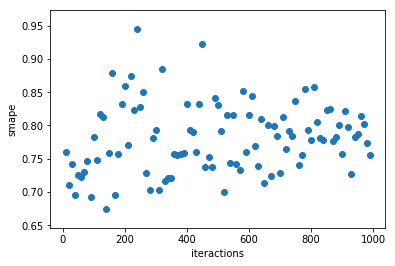

In [55]:
plt.scatter(df["iteraction"].values, df["smape"].values)
plt.xlabel("iteractions")
plt.ylabel("smape")

### 2. Single station

#### 2.1single station single feature

单站点100次迭代以内就达到最优，最优 smape 0.647

In [28]:
df = pd.read_csv("data/one_station_one_feature_seq2seq_result.csv")

In [29]:
df.head()

,multivariate_0_iteractions,0.7706670345571577
0,multivariate_1000_iteractions,0.773359
1,multivariate_100_iteractions,0.742364
2,multivariate_1010_iteractions,0.778937
3,multivariate_1020_iteractions,0.805360
4,multivariate_1030_iteractions,0.763963


In [30]:
name_group = {"0.7706670345571577":"smape", "multivariate_0_iteractions":"iteraction"}
df.rename(columns=name_group, inplace=True)
df['iteraction'] = df['iteraction'].apply(lambda x : x.split("_")[1])

In [32]:
df.sort_values(by="smape").head(10)

,iteraction,smape
145,50,0.647628
167,70,0.669117
134,40,0.672785
123,30,0.673520
11,10,0.674808
156,60,0.680139
24,120,0.686589
179,810,0.695652
182,840,0.701456
181,830,0.724289


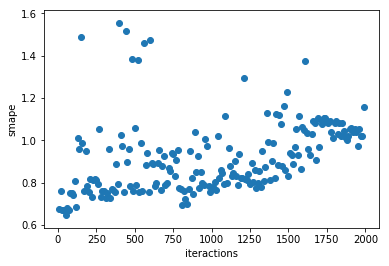

In [33]:
plt.scatter(df["iteraction"].values, df["smape"].values)
plt.xlabel("iteractions")
plt.ylabel("smape")

#### 2.2 meo single station single feature 

单站点100次迭代以内就达到最优，最优 smape 0.639

In [34]:
df = pd.read_csv("data/meo_one_station_one_feature_seq2seq_result.csv")

In [35]:
df.head()

,multivariate_0_iteractions,0.7795281971878046
0,multivariate_1000_iteractions,0.726430
1,multivariate_100_iteractions,1.313015
2,multivariate_1010_iteractions,0.742789
3,multivariate_1020_iteractions,0.730564
4,multivariate_1030_iteractions,0.699319


In [36]:
name_group = {"0.7795281971878046":"smape", "multivariate_0_iteractions":"iteraction"}
df.rename(columns=name_group, inplace=True)
df['iteraction'] = df['iteraction'].apply(lambda x : x.split("_")[1])

In [37]:
df.head()

,iteraction,smape
0,1000,0.726430
1,100,1.313015
2,1010,0.742789
3,1020,0.730564
4,1030,0.699319


In [38]:
df.sort_values(by="smape").head(10)

,iteraction,smape
156,60,0.639912
123,30,0.643546
167,70,0.653332
145,50,0.654755
134,40,0.657942
160,640,0.663925
195,960,0.669631
180,820,0.671253
192,930,0.672308
188,900,0.672390


#### 2.3 less hidden dim single station single feature 

在站点模型中，使用 hidden_dim=8 效果明显好于 hidden_dim=32，原因可能是数据量小，过于复杂的模型没有必要。

In [39]:
df = pd.read_csv("data/less_hidden_dim_one_station_one_feature_seq2seq_result.csv")

In [40]:
df.head()

,multivariate_0_iteractions,0.7837991917855208
0,multivariate_1000_iteractions,0.745259
1,multivariate_100_iteractions,0.658049
2,multivariate_1010_iteractions,0.876055
3,multivariate_1020_iteractions,0.794068
4,multivariate_1030_iteractions,1.134825


In [41]:
name_group = {"0.7837991917855208":"smape", "multivariate_0_iteractions":"iteraction"}
df.rename(columns=name_group, inplace=True)
df['iteraction'] = df['iteraction'].apply(lambda x : x.split("_")[1])

In [42]:
df.sort_values(by="smape").head(10)

,iteraction,smape
117,250,0.632440
90,180,0.635858
68,160,0.639554
101,190,0.641762
79,170,0.646663
35,130,0.649056
119,270,0.649192
57,150,0.649227
116,240,0.652725
46,140,0.653823
